<a href="https://colab.research.google.com/github/MagalyCabrera8/TAM-2025-2/blob/main/Proyecci%C3%B3nIm%C3%A1genes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRIMER PASO**

En este paso, se cargan las imágenes y se las convierte a escala de grises, en la escala de grises, por cada pixel se calcula el promedio de los 3 colores, arroja un valor entre 0 y 255, el cero indica negro y el 255 indica blanco; luego se calcula cual es al ancho y el alto mínimo de cada una de las fotos, para poder pasar a redimensionar alguna foto de ser necesario. Las imagenes en escala de grises se convierten a matrices numéricas.

In [ ]:

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Nombra tus archivos de imagen aquí
imagen1_path = 'Justin1.jpeg'
imagen2_path = 'jb2.jpg'

# Cargar las imágenes
imagen1 = Image.open(imagen1_path).convert('L')
imagen2 = Image.open(imagen2_path).convert('L')


# Obtener las dimensiones de las imágenes
ancho1, alto1 = imagen1.size
ancho2, alto2 = imagen2.size

# Determinar las dimensiones de la imagen más pequeña
nuevo_ancho = min(ancho1, ancho2)
nuevo_alto = min(alto1, alto2)

# Si las dimensiones no son iguales, redimensionar ambas imágenes a las nuevas dimensiones
if (ancho1, alto1) != (nuevo_ancho, nuevo_alto):
    print(f"Redimensionando la Foto 1 de {ancho1}x{alto1} a {nuevo_ancho}x{nuevo_alto}.")
    imagen1 = imagen1.resize((nuevo_ancho, nuevo_alto))

if (ancho2, alto2) != (nuevo_ancho, nuevo_alto):
    print(f"Redimensionando la Foto 2 de {ancho2}x{alto2} a {nuevo_ancho}x{nuevo_alto}.")
    imagen2 = imagen2.resize((nuevo_ancho, nuevo_alto))

# Convertir las imágenes a matrices de NumPy
matriz_a = np.asarray(imagen1, np.float32)
matriz_b = np.asarray(imagen2,np.float32)

# Mostrar las dimensiones de las matrices para confirmar
print(f"Dimensiones de la matriz de la Foto 1: {matriz_a.shape}")
print(f"Dimensiones de la matriz de la Foto 2: {matriz_b.shape}")


Redimensionando la Foto 1 de 750x448 a 696x448.
Redimensionando la Foto 2 de 696x960 a 696x448.
Dimensiones de la matriz de la Foto 1: (448, 696)
Dimensiones de la matriz de la Foto 2: (448, 696)


**SEGUNDO PASO**
Se hace el 'aplanamiento' de las matrices para convertirlas en vectores, después se calcula el producto punto entre los dos vectores y la norma del vector b (imagen b), se procede a calcular el alfa.

In [ ]:

# 1. Aplanar las matrices para convertirlas en vectores
# El método .flatten() toma la matriz y la convierte en un vector 1D
vector_a = matriz_a.flatten()
vector_b = matriz_b.flatten()

print(f"El vector aplanado de  'a' tiene una longitud de: {len(vector_a)}")
print(f"El vector aplanado de 'b' tiene una longitud de: {len(vector_b)}")

# 2. Calcular los componentes de la fórmula de proyección
# El producto punto se calcula con np.dot()
producto_punto = np.dot(vector_a, vector_b)

# La norma al cuadrado se calcula con np.linalg.norm() y elevando al cuadrado
norma_b_cuadrada = np.linalg.norm(vector_b)**2

# 3. Calcular el escalar alfa (α)
alfa_mat = producto_punto / norma_b_cuadrada

# 4. Calcular el vector de proyección
# Esto es simplemente multiplicar el vector b por el escalar alfa
proyeccion_vector = alfa_mat * vector_b

print(f"\nEl escalar alfa (α) es: {alfa_mat}")
print(f"El vector de proyección tiene una longitud de: {len(proyeccion_vector)}")

# Guardar el vector de proyección para el siguiente paso
np.save('proyeccion.npy', proyeccion_vector)

El vector aplanado de  'a' tiene una longitud de: 311808
El vector aplanado de 'b' tiene una longitud de: 311808

El escalar alfa (α) es: 0.7362439632415771
El vector de proyección tiene una longitud de: 311808


***SOLUCIÓN ITERATIVA - DESCENSO DEL GRADIENTE***


---




Descenso de Gradiente finalizado.
Total de iteraciones: 250
Valor óptimo de alfa encontrado: 0.7343706489
Cambio final en el coste: 0.000000000000000


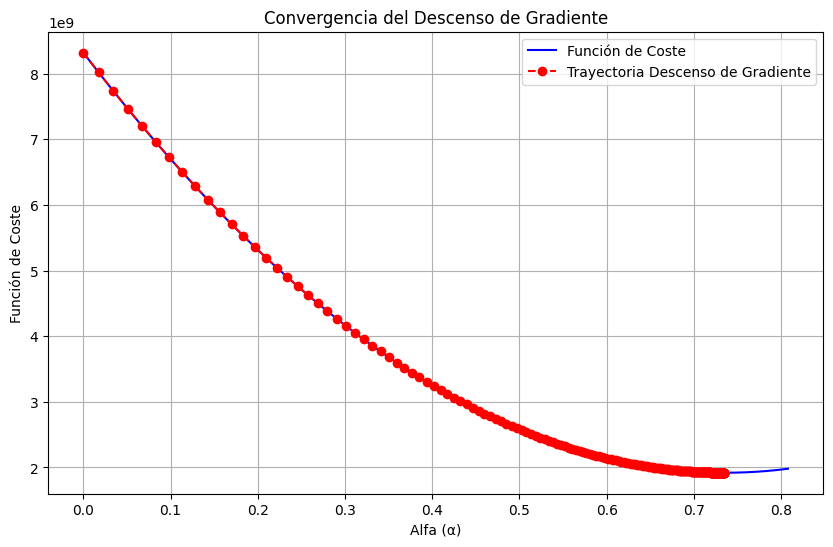

In [ ]:
# --- Parámetros del Descenso de Gradiente ---
alfa = 0.0
tasa_aprendizaje = 1e-12
tolerancia = 1e-10

# --- Variables para el ciclo while y registro de la trayectoria ---
coste_previo = float('inf')
coste_actual = np.linalg.norm(vector_a - alfa * vector_b)**2 # Calcular coste inicial
iteracion = 0

# Listas para guardar la trayectoria
historial_alfa = [alfa]
historial_coste = [coste_actual]


# --- Bucle while ---
while abs(coste_previo - coste_actual) > tolerancia:

    coste_previo = coste_actual

    # Calcular el gradiente
    gradiente = 2 * alfa * norma_b_cuadrada - 2 * producto_punto

    # Actualizar alfa
    alfa = alfa - tasa_aprendizaje * gradiente

    # Calcular el coste actual
    coste_actual = np.linalg.norm(vector_a - alfa * vector_b)**2

    iteracion += 1

    # Guardar los valores para la gráfica
    historial_alfa.append(alfa)
    historial_coste.append(coste_actual)




print("\nDescenso de Gradiente finalizado.")
print(f"Total de iteraciones: {iteracion}")
print(f"Valor óptimo de alfa encontrado: {alfa:.10f}")
print(f"Cambio final en el coste: {abs(coste_previo - coste_actual):.15f}")

# --- Visualizar la trayectoria del Descenso de Gradiente ---
plt.figure(figsize=(10, 6))

# Graficar la función de coste (opcional, para ver la forma de la curva)
# Esto requiere calcular muchos puntos de la función de coste
alfa_valores = np.linspace(min(historial_alfa) * 0.9, max(historial_alfa) * 1.1, 500)
coste_valores = [np.linalg.norm(vector_a - a_val * vector_b)**2 for a_val in alfa_valores]
plt.plot(alfa_valores, coste_valores, label='Función de Coste', color='blue')

# Graficar la trayectoria del Descenso de Gradiente
plt.plot(historial_alfa, historial_coste, marker='o', color='red', linestyle='--', label='Trayectoria Descenso de Gradiente')

plt.title("Convergencia del Descenso de Gradiente")
plt.xlabel("Alfa (α)")
plt.ylabel("Función de Coste")
plt.grid(True)
plt.legend()
plt.show()

# Guardar el vector de proyección para visualización posterior
proyeccion_vector_iterativa = alfa * vector_b

In [ ]:

costo_final = np.linalg.norm(vector_a - alfa * vector_b)**2

print(f"El costo final con el alfa obtenido es: {costo_final}")

El costo final con el alfa obtenido es: 1919646720.0


# ***PROCEDIMIENTO CON IMÁGENES A COLOR***

---



In [ ]:


imagen1 = Image.open(imagen1_path).convert('RGB') # Convertir a RGB si es necesario
imagen2 = Image.open(imagen2_path).convert('RGB')

# Obtener las dimensiones de las imágenes
ancho1, alto1 = imagen1.size
ancho2, alto2 = imagen2.size

# Determinar las dimensiones de la imagen más pequeña
nuevo_ancho = min(ancho1, ancho2)
nuevo_alto = min(alto1, alto2)

# Si las dimensiones no son iguales, redimensionar ambas imágenes
if (ancho1, alto1) != (nuevo_ancho, nuevo_alto):
    print(f"Redimensionando la Foto 1 de {ancho1}x{alto1} a {nuevo_ancho}x{nuevo_alto}.")
    imagen1 = imagen1.resize((nuevo_ancho, nuevo_alto))

if (ancho2, alto2) != (nuevo_ancho, nuevo_alto):
    print(f"Redimensionando la Foto 2 de {ancho2}x{alto2} a {nuevo_ancho}x{nuevo_alto}.")
    imagen2 = imagen2.resize((nuevo_ancho, nuevo_alto))

# Convertir las imágenes a matrices de NumPy.
# La matriz tendrá 3 canales para RGB.
matriz_a = np.array(imagen1)
matriz_b = np.array(imagen2)

# Mostrar las dimensiones de las matrices para confirmar
print(f"Dimensiones de la matriz de la Foto 1: {matriz_a.shape}")
print(f"Dimensiones de la matriz de la Foto 2: {matriz_b.shape}")



Redimensionando la Foto 1 de 750x448 a 696x448.
Redimensionando la Foto 2 de 696x960 a 696x448.
Dimensiones de la matriz de la Foto 1: (448, 696, 3)
Dimensiones de la matriz de la Foto 2: (448, 696, 3)


In [ ]:


# 1. Aplanar las matrices para convertirlas en vectores
# El método .flatten() apila los 3 canales en un solo vector largo
v_aColor = matriz_a.flatten().astype(np.float32)
v_bColor = matriz_b.flatten().astype(np.float32)

print(f"La longitud del vector 'a' es: {len(v_aColor)}")
print(f"La longitud del vector 'b' es: {len(v_bColor)}")

# 2. Calcular los componentes de la fórmula de proyección
pp_Color = np.dot(v_aColor, v_bColor) #Producto punto
nBColor = np.linalg.norm(v_bColor)**2 #Norma de b

alfa_color = pp_Color / nBColor


# 4. Calcular el vector de proyección
proyec_color = alfa_color * vector_b

print(f"\nEl escalar alfa (α) es: {alfa_color}")
print(f"El vector de proyección tiene una longitud de: {len(proyeccion_vector)}")



La longitud del vector 'a' es: 935424
La longitud del vector 'b' es: 935424

El escalar alfa (α) es: 0.7270433902740479
El vector de proyección tiene una longitud de: 311808


In [ ]:


# Asumiendo que v_aColor, v_bColor, pp_Color y nBColor están definidos
# Si no lo están, asegúrate de que el código anterior se haya ejecutado

# --- 3. Parámetros para el Descenso de Gradiente ---
alfa_itC = 0.0
tasa_aprendizajeC = 1e-15
tolerancia = 1e-1

# Variables para el bucle while
coste_antC = 0
coste_actC = np.linalg.norm(v_aColor - alfa_itC * v_bColor)**2
iteracion = 0

# Listas para guardar el historial
historial_alfaC = [alfa_itC]
historial_costeC = [coste_actC]

print("Iniciando el Descenso de Gradiente con historial...\n")

# --- 5. Bucle de Descenso de Gradiente ---
while abs(coste_antC - coste_actC) > tolerancia:
    coste_antC = coste_actC

    # Calcular el gradiente
    gradienteC = 2 * alfa_itC * nBColor - 2 * pp_Color

    # Actualizar alfa
    alfa_itC = alfa_itC - tasa_aprendizajeC * gradienteC

    # Calcular el nuevo costo
    coste_actC = np.linalg.norm(v_aColor - alfa_itC * v_bColor)**2

    iteracion += 1

    # Guardar los valores en las listas
    historial_alfaC.append(alfa_itC)
    historial_costeC.append(coste_actC)

print("\nDescenso de Gradiente finalizado.")
print(f"Total de iteraciones: {iteracion}")
print(f"Valor óptimo de alfa encontrado: {alfa_itC:.10f}")



Iniciando el Descenso de Gradiente con historial...


Descenso de Gradiente finalizado.
Total de iteraciones: 34503
Valor óptimo de alfa encontrado: 0.6667729020


In [ ]:
# Calcular la diferencia entre el costo final de RGB y el costo final de escala de grises
diferencia_costo = costeColor - costo_final
print(f"Diferencia entre el costo final RGB y el costo final escala de grises: {diferencia_costo}")

NameError: name 'costeColor' is not defined

In [ ]:
print(f"Costo final para escala de grises: {costo_final}")
print(f"Costo final para RGB: {costeColor}")

In [ ]:
# Diferencia para escala de grises
diferencia_alfa_gris = abs(alfa_mat - alfa)
print(f"Diferencia entre alfa analítico e iterativo (Escala de Grises): {diferencia_alfa_gris:.10f}")

# Diferencia para RGB (already calculated in a previous turn)
diferencia_alfa_rgb = abs(alfa_color - alfa_itC)
print(f"Diferencia entre alfa analítico e iterativo (RGB): {diferencia_alfa_rgb:.10f}")

In [ ]:
# --- Visualizar la trayectoria del Descenso de Gradiente para RGB ---
plt.figure(figsize=(10, 6))

# Graficar la función de coste (opcional, para ver la forma de la curva)
# Esto requiere calcular muchos puntos de la función de coste
alfa_valoresC = np.linspace(min(historial_alfaC) * 0.9, max(historial_alfaC) * 1.1, 500)
coste_valoresC = [np.linalg.norm(v_aColor - a_val * v_bColor)**2 for a_val in alfa_valoresC]
plt.plot(alfa_valoresC, coste_valoresC, label='Función de Coste (RGB)', color='blue')

# Graficar la trayectoria del Descenso de Gradiente
plt.plot(historial_alfaC, historial_costeC, marker='o', color='red', linestyle='--', label='Trayectoria Descenso de Gradiente (RGB)')

plt.title("Convergencia del Descenso de Gradiente (RGB)")
plt.xlabel("Alfa (α)")
plt.ylabel("Función de Coste")
plt.grid(True)
plt.legend()
plt.show()